# Multi-Lable Classification with MLP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys
sys.path.append(os.pardir)

from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

## Load Vectorized Synopsis/Genre Data

In [2]:
synop_vec = pd.read_csv('../synopsis_vector/synopsis_vector.csv')
synop_vec.head()

,MAL_ID,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,1,-0.115295,-3.925781,0.509277,1.326172,2.685547,1.787109,-1.766602,-1.253906,-1.898438,...,0.862305,-0.738770,-1.120117,-0.728516,1.066406,1.273438,-0.247070,1.378906,1.921875,2.218750
1,5,2.314453,-2.363281,-0.013374,2.705078,1.199219,3.171875,-1.359375,-2.605469,-1.960938,...,0.495850,-0.945801,-0.938965,-0.259766,2.087891,1.500000,-0.221924,0.645508,2.220703,0.959473
2,6,-0.225220,-2.599609,-0.183350,2.042969,1.671875,1.951172,-1.367188,-2.916016,-0.161621,...,-1.436523,-1.022461,-2.535156,-2.455078,2.013672,1.943359,0.623047,1.701172,2.359375,1.232422
3,7,0.844727,-0.527344,0.271484,0.753418,1.576172,2.492188,-1.652344,-2.705078,-2.271484,...,-0.366943,-1.791016,-1.804688,-2.474609,2.880859,0.426514,-0.582520,3.105469,0.839355,1.042969
4,8,1.522461,-2.654297,0.423584,1.816406,2.029297,1.697266,0.608887,-1.333008,-1.022461,...,1.652344,-1.703125,-2.476562,-4.488281,1.402344,0.639160,0.059204,1.250000,2.458984,2.517578


In [3]:
genre_vec = pd.read_csv('../clean_data/genre.csv')
genre_vec.head()

,MAL_ID,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,1,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,6,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,8,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


## Split Train-Test Set

In [4]:
synop_cols = synop_vec.columns.drop('MAL_ID').tolist()
genre_cols = genre_vec.columns.drop('MAL_ID').tolist()

In [5]:
full_vec = pd.merge(synop_vec, genre_vec)
full_vec.head()

,MAL_ID,0,1,2,3,4,5,6,7,8,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,1,-0.115295,-3.925781,0.509277,1.326172,2.685547,1.787109,-1.766602,-1.253906,-1.898438,...,0,0,1,0,0,0,0,0,0,0
1,5,2.314453,-2.363281,-0.013374,2.705078,1.199219,3.171875,-1.359375,-2.605469,-1.960938,...,0,0,1,0,0,0,0,0,0,0
2,6,-0.225220,-2.599609,-0.183350,2.042969,1.671875,1.951172,-1.367188,-2.916016,-0.161621,...,0,0,0,0,0,0,0,0,0,0
3,7,0.844727,-0.527344,0.271484,0.753418,1.576172,2.492188,-1.652344,-2.705078,-2.271484,...,0,0,0,0,0,1,0,0,0,0
4,8,1.522461,-2.654297,0.423584,1.816406,2.029297,1.697266,0.608887,-1.333008,-1.022461,...,0,0,0,0,0,1,0,0,0,0


In [6]:
# random shuffle and re-index
full_vec = full_vec.sample(frac=1).reset_index(drop=True)
full_vec.head()

,MAL_ID,0,1,2,3,4,5,6,7,8,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,1451,2.330078,-2.378906,-0.070312,3.896484,2.220703,0.348633,-0.542969,-4.332031,-0.992676,...,0,0,0,0,0,1,1,0,0,0
1,977,0.750977,-1.962891,-1.068359,1.651367,1.711914,2.777344,-2.064453,-2.527344,-1.448242,...,0,0,0,0,0,0,0,0,1,0
2,3377,0.216675,-1.500000,0.185913,1.708008,1.520508,0.958496,-0.792480,-1.439453,-0.143799,...,0,0,0,0,0,0,0,0,0,0
3,687,1.665039,-3.685547,-0.322021,0.655273,1.458984,2.089844,-1.520508,-1.697266,-1.283203,...,0,0,0,0,0,0,0,0,0,0
4,31490,2.089844,-1.866211,0.760742,2.164062,2.244141,0.508301,-3.003906,-1.269531,-3.957031,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_ratio = 0.7

num_train = int(len(full_vec) * train_ratio)

x_train = full_vec[synop_cols][:num_train].values
t_train = full_vec[genre_cols][:num_train].values

x_test = full_vec[synop_cols][num_train:].values
t_test = full_vec[genre_cols][num_train:].values

del synop_vec, genre_vec, full_vec

In [20]:
len(np.unique(t_train, axis=0))

1987

## Define Model

In [12]:
input_size  = len(synop_cols)
output_size = len(genre_cols)

dropout_ratio = 0.2

network = MultiLayerNetExtend(input_size=input_size,
                              hidden_size_list=[300, 300, 300, 300],
                              output_size=output_size,
                              use_dropout=True,
                              dropout_ration=dropout_ratio,
                              use_batchnorm=True)

In [13]:
num_epochs = 100
batch_size = 100

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=num_epochs,
                  mini_batch_size=batch_size,
                  optimizer='adam',
                  verbose=False)

## Train Model

In [14]:
trainer.train()

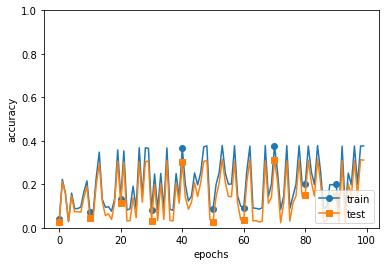

In [15]:
train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()